# Il "gender gap" in informatica esiste? 

### Analisi dei dati del sondaggio

In [1]:
import pandas as pd

In [2]:
answers = pd.read_excel("data/answers.xlsx", index_col=None, header=0, skiprows=1, parse_dates=["Timestamp"], )
# fill in-place empty answers
answers.fillna("", inplace=True)

In [3]:
# Setting Categorical Data for "Multiple-Choice" Questions

from pandas.api.types import CategoricalDtype
from form import ROLES, AGE_RANGE, MOTIVATIONS, W_DISCRIMINATION, M_DISCRIMINATION
from form import COMPANY_SIZE, COMPANY_TYPE, WOMEN_RATIO, WOMEN_CIRCLE, DIVERSITY_POLICY

# Role Cat
answers["role_cat"] = answers.Role.apply(lambda a: a if a in ROLES else "Other").astype("category")
answers["Role"] = answers["Role"].astype("category")

# Age
age_ranges = CategoricalDtype(categories=AGE_RANGE, ordered=True)
answers["Age"] = answers["Age"].astype(age_ranges)

# Gender
answers["Gender"] = answers["Gender"].astype("category")

# Company Size
company_size_cat = CategoricalDtype(categories=COMPANY_SIZE, ordered=True)
answers["Company_Size"] = answers["Company-Size"].apply(lambda v: v.strip().lower()).astype(company_size_cat)

# Company Type
answers["Company_Type"] = answers["Company-Based"].apply(lambda a: a if a in COMPANY_TYPE else "Other").astype("category")

# Woman Ratio
company_women_ratio_cat = CategoricalDtype(categories=WOMEN_RATIO[::-1], ordered=True)
answers["Company_Women_Ratio"] = answers["Gender-gap"].astype(company_women_ratio_cat)

# Women in Network (~= Outreach)
women_in_circle_cat = CategoricalDtype(categories=WOMEN_CIRCLE)
answers["Women_Circle"] = answers["Gender-outreach"].astype(women_in_circle_cat)

# Company Diversity
company_diversity_policy_cat = CategoricalDtype(categories=DIVERSITY_POLICY)
answers["Company_Diversity_Policy"] = answers["Company-Diversity"].astype(company_diversity_policy_cat)

# Increase Gap
answers["increase_gender_gap"] = answers["FIX-Gender-Gap"].astype("category")

# Women Discrimination
women_discr_cat = CategoricalDtype(categories=W_DISCRIMINATION, ordered=True)
answers["W_Discrimination"] = answers["W-Discrimination"].astype(women_discr_cat)

# Men Discrimination (Exp)
men_discr_cat = CategoricalDtype(categories=M_DISCRIMINATION, ordered=True)
answers["M_Discrimination"] = answers["M-Discrimination"].astype(men_discr_cat)

# Descrizione del Campione

Per prima cosa cerchiamo di descrivere qual sia il campione rappresentato dai partecipanti al sondaggio

In [4]:
from plot import bar_plot

from IPython.display import Markdown as Markdown

question = lambda s: Markdown(f"### Domanda: {s}")

In [5]:
from form import GENDER_QUESTION

question(GENDER_QUESTION)

### Domanda: Ti riconosci come...?

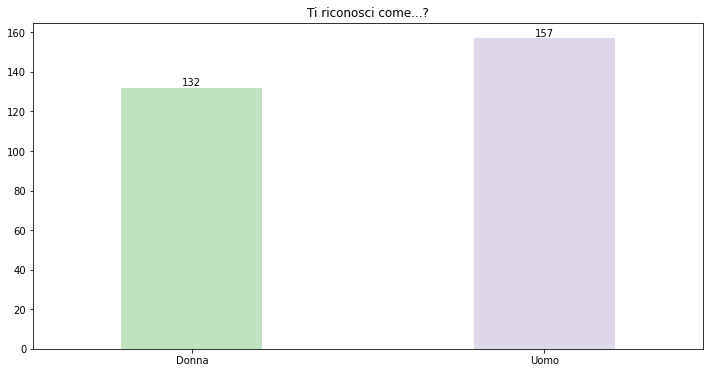

In [6]:
from matplotlib import pyplot as plt
gender_cmap = plt.get_cmap("Accent")

bar_plot(df=answers, columns=["Gender"], title=GENDER_QUESTION, width=0.4, 
         filename="part1_01_campione_genere.pdf", legend=False, colors=gender_cmap.colors)

Campione mediamente distribuito per genere

In [7]:
from form import AGE_RANGE_QUESTION

question(AGE_RANGE_QUESTION)

### Domanda: Quanti anni hai ?

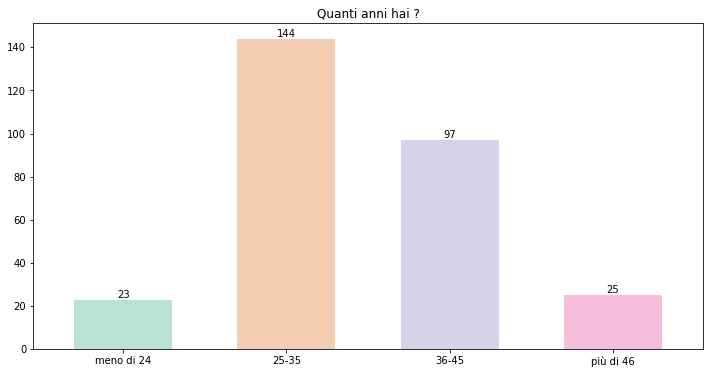

In [8]:
age_cmap = plt.get_cmap("Dark2")

bar_plot(df=answers, columns=["Age"], title=AGE_RANGE_QUESTION, width=0.6, alpha=0.3,
         filename="part1_02_campione_fascia_eta.pdf",
         colors=age_cmap.colors, legend=False)

maggiormente rappresentato da persone tra i 25 e i 45 anni

**Distribuzione dell'età dei partecipanti nel campione** per Genere

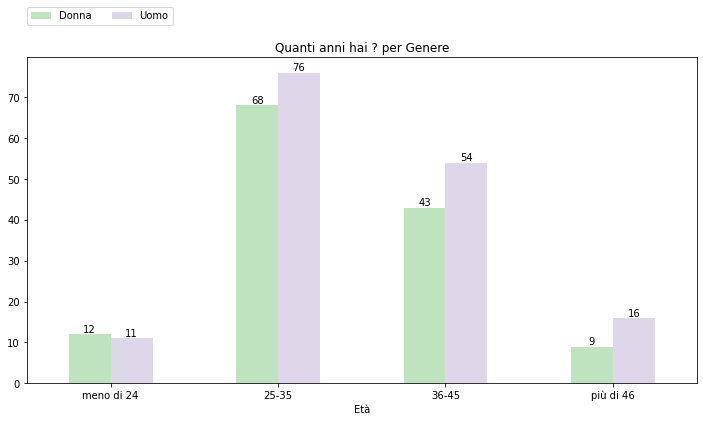

In [9]:
bar_plot(df=answers, columns=["Gender", "Age"], title=f"{AGE_RANGE_QUESTION} per Genere", 
         filename="part1_03_campione_fascia_eta_per_genere.pdf",
         width=0.5, unstack_ord=(0, ), colors=gender_cmap.colors, axis_label="Età")

in proporzioni comparabili per entrambi i generi considerati

---

In [10]:
from form import ROLES_QUESTION

question(ROLES_QUESTION)

### Domanda: Qual è la tua occupazione?

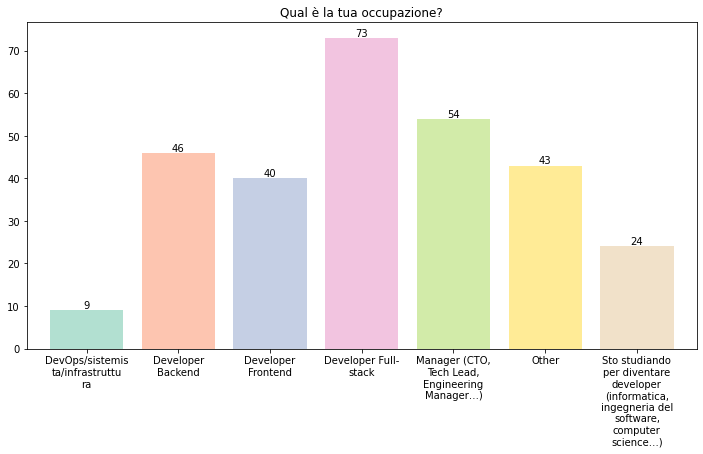

In [11]:
bar_plot(df=answers, columns=["role_cat"], title=ROLES_QUESTION, 
         filename="part1_04_campione_ruolo_professionale.pdf",
         width=0.8, sorted="index", wrapping=15, legend=False)

In [12]:
other_roles = answers[answers.role_cat == "Other"]["Role"].value_counts()
pd.DataFrame({"Other Roles": other_roles.index.values, "Count": other_roles.values}).head(n=8)

,Other Roles,Count
0,Data scientist,3
1,Analista funzionale,2
2,Consulente,2
3,Studente autodidatta,1
4,QA,1
5,Responsabile della comunicazione in una Softwa...,1
6,Ricercatore,1
7,Security analyst and developer,1


**Distribuzione dei Ruoli professionali** organizzati per genere (`Uomo`, `Donna`)

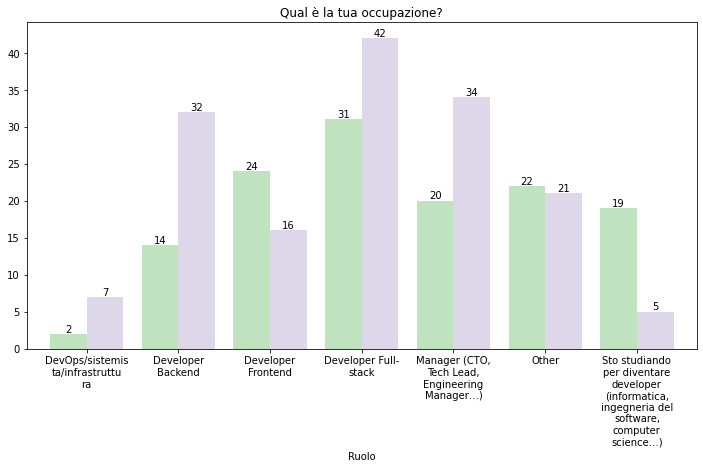

In [13]:
bar_plot(df=answers, columns=["Gender", "role_cat"], title=ROLES_QUESTION, unstack_ord=(0, ),
         filename="part1_05_campione_ruolo_professionale_per_genere.pdf",
         width=0.8, sorted="values", wrapping=15, legend=False, 
         colors=gender_cmap.colors, axis_label="Ruolo")

Il **secondo** ruolo professionale rappresentanto nel campione corrisponde a quello di `Manage-CTO-Professor`. Similmente, diventa interessante investigare la stratificazione di questo sotto-campione per _fascia di età_:

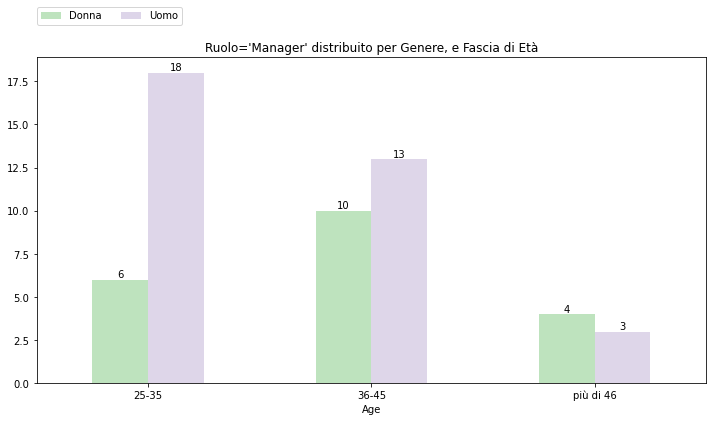

In [14]:
MANAGER = "Manager (CTO, Tech Lead, Engineering Manager…)"
bar_plot(df=answers, columns=["Gender", "Age"],
         filename="part1_06_campione_ruolo_manager_genere_eta.pdf",
         selection=answers.role_cat == MANAGER,
         unstack_ord=(0, ), title="Ruolo='Manager' distribuito per Genere, e Fascia di Età", colors=gender_cmap.colors)

Da questo grafico emerge che la `Donna` rappresentata nel campione afferisce mediamente ad una fascia di età più alta rispetto a `Uomo` per raggiungere un egual livello di _anzianità professionale_

**Backup**

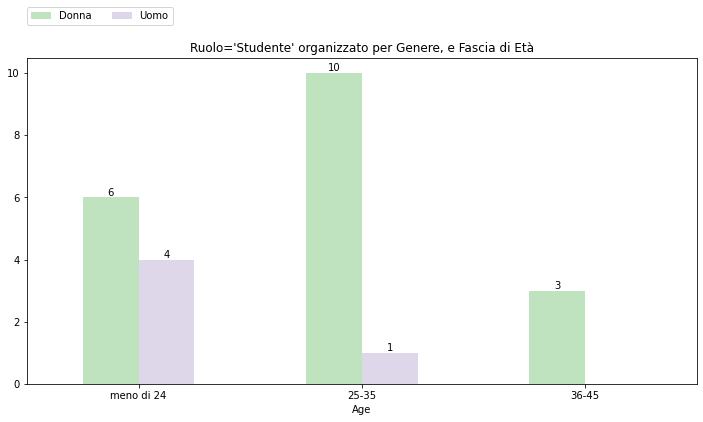

In [15]:
# Backup
STUDENT = "Sto studiando per diventare developer (informatica, ingegneria del software, computer science…)"
bar_plot(df=answers, columns=["Gender", "Age"], selection=answers.role_cat == STUDENT,
         filename="backup_part1_campione_studenti_per_eta.pdf",
         unstack_ord=(0, ), title="Ruolo='Studente' organizzato per Genere, e Fascia di Età", colors=gender_cmap.colors)

**DOMANDA**: Perché _non filtrare_ gli "estremi" del campione per fascia di età? 

Perché il risultato avrebbe escluso il punto di vista di Donne Manager!

--- 

### Descrizione del Campione (Cont.)

**Motivazioni Professionali e _Gender Outreach_**

In [16]:
from form import MOTIVATIONS_QUESTION

question(MOTIVATIONS_QUESTION)

### Domanda: Perché hai scelto di studiare/lavorare nel campo dell’informatica e della programmazione?

In [17]:
from utils import process_multiple_choices
from form import MOTIVATIONS

motivations, other_motivations, motivation_map = process_multiple_choices(answers.Motivation, choices=MOTIVATIONS, other_cat_name="Altro")

motivations_data = {"Gender": answers.Gender.values, "Age": answers.Age.values}
motivations_data.update(zip(motivations, motivation_map))
motivations_df = pd.DataFrame(motivations_data)

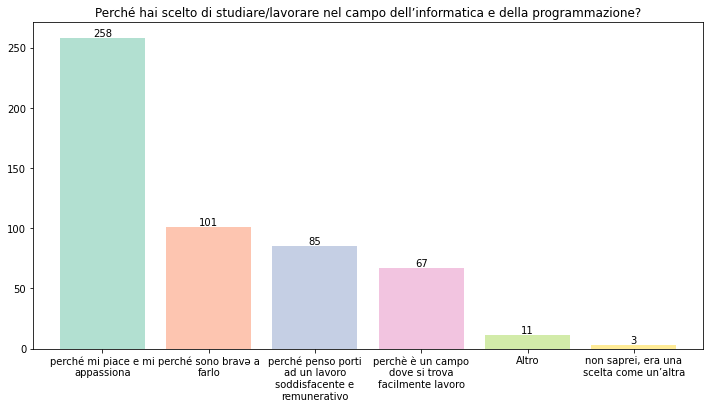

In [18]:
bar_plot(columns=motivations_df.columns.difference(["Gender", "role_group", "Age"]).tolist(), 
         df=motivations_df, filename="part1_07_campione_motivazioni_scelta_professionale.pdf",
         aggregate="sum", sorted="values", legend=False,
         figsize=(12, 6), width=0.8, title=MOTIVATIONS_QUESTION)

Dal momento che si trattava di scelte mulitple, potremmo analizzare le scelte co-occorrenti

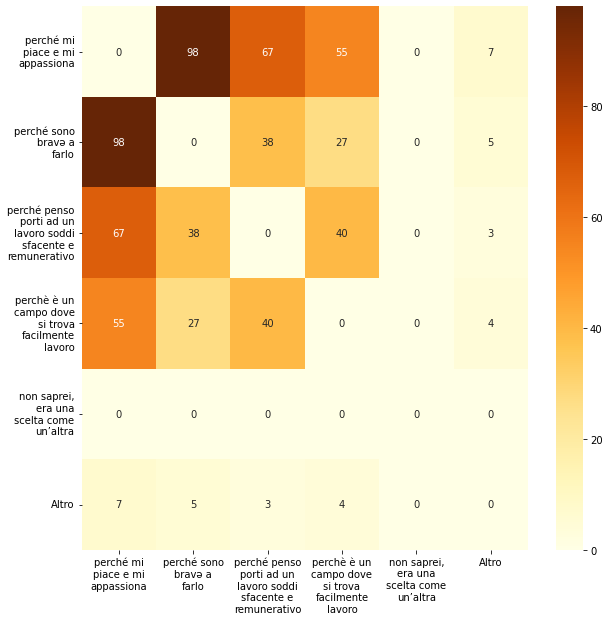

In [19]:
from plot import heatmap_co_occurrence

heatmap_co_occurrence(motivation_map, labels=motivations, wrapping=12, colors="YlOrBr", 
                      filename="part1_08_campione_motivazioni_scelta_professionale_heatmap.pdf")

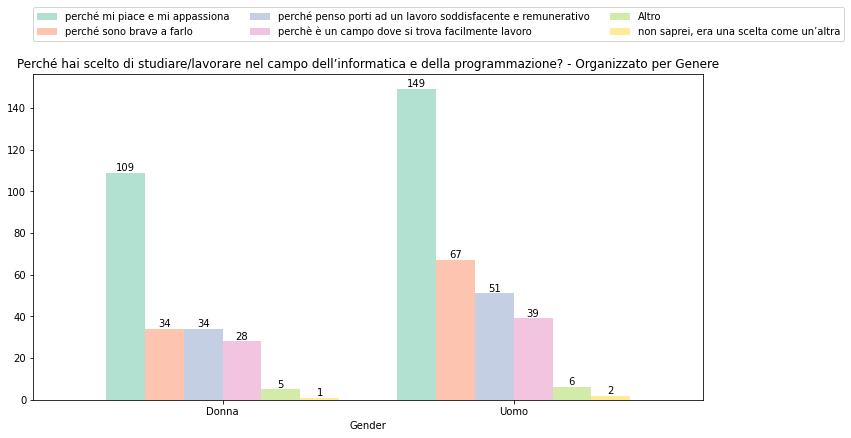

In [20]:
bar_plot(columns=motivations_df.columns.difference(["role_group", "Age"]).tolist(), df=motivations_df,
         aggregate="sum", sorted="values", groupby_cols=["Gender"],
         filename="part1_09_campione_motivazioni_scelta_professionale_per_genere.pdf",
         figsize=(12, 6), width=0.8, title=f"{MOTIVATIONS_QUESTION} - Organizzato per Genere")

In [21]:
from form import WOMEN_CIRCLE_QUESTION

question(WOMEN_CIRCLE_QUESTION)

### Domanda: Oltre a quelle che lavorano/studiano con te, quante donne programmatrici/sistemiste/studentesse di informatica conosci?

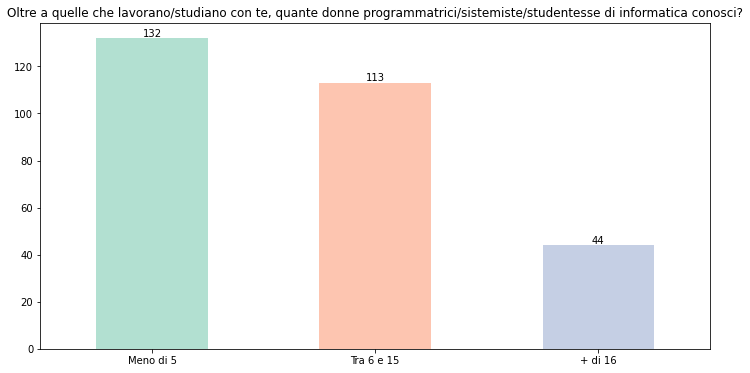

In [22]:
bar_plot(df=answers, columns=["Women_Circle"], filename="part1_10_campione_women_outreach.pdf",
         title=WOMEN_CIRCLE_QUESTION, sorted="index", )

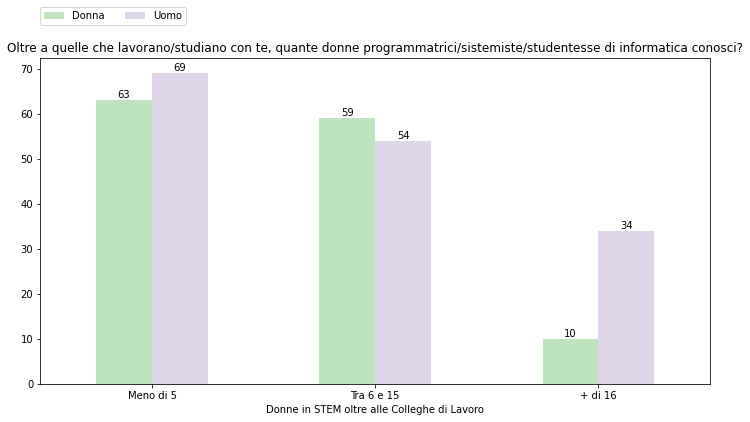

In [23]:
bar_plot(df=answers, columns=["Gender", "Women_Circle"], colors=gender_cmap.colors,
         filename="part1_11_campione_gender_outreach_per_genere.pdf",
         title=WOMEN_CIRCLE_QUESTION, sorted="index", unstack_ord=(0, ),
         axis_label="Donne in STEM oltre alle Colleghe di Lavoro")

Questa analisi è importante per leggere le risposte "difficoltà di relazionarsi con lo stesso o altro sesso!"

---

## Descrizione del Contesto Professionale

Descrizione del contesto professionale rappresentato nel campione. 

Per contesto professionale si intende la realtà professionale (_if any_) di afferenza dei partecipanti al sondaggio

In [24]:
from form import COMPANY_TYPE_QUESTION, COMPANY_SIZE_QUESTION

question(COMPANY_TYPE_QUESTION)

### Domanda: L'azienda/organizzazione in cui lavori è

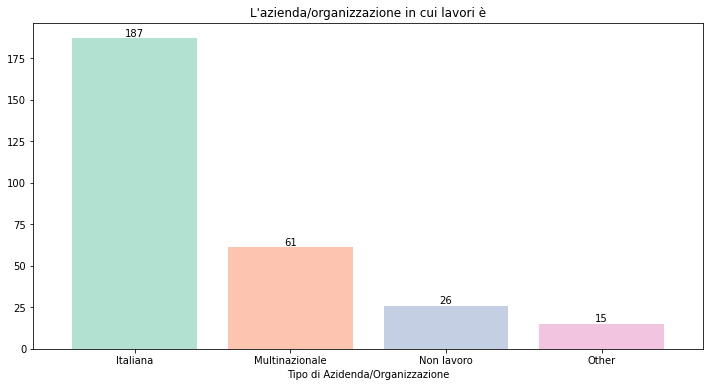

In [25]:
bar_plot(df=answers, columns=["Company_Type"], title=COMPANY_TYPE_QUESTION,
         filename="part2_01_campione_contesto_professionale.pdf",
         width=0.8, sorted="values", wrapping=15, legend=False, 
         axis_label="Tipo di Azidenda/Organizzazione")

In [26]:
other_companies = answers[answers.Company_Type == "Other"]["Company-Based"].value_counts()
pd.DataFrame({"Altre Aziende/Organizzazioni": other_companies.index.values, "Count": other_companies.values}).head(n=15)

,Altre Aziende/Organizzazioni,Count
0,Non lavoro in azienda,6
1,Tedesca,1
2,Austriaca,1
3,Software Agency in Germania,1
4,Pakistan,1
5,Inglese,1
6,UK,1
7,Startup straniera,1
8,inglese,1
9,"Olandese, ma siamo tutti italiani",1


Pertanto possiamo affermare che la maggiorparte del campione è rappresentante di un contesto lavorativo in **Azienda Italiana**.



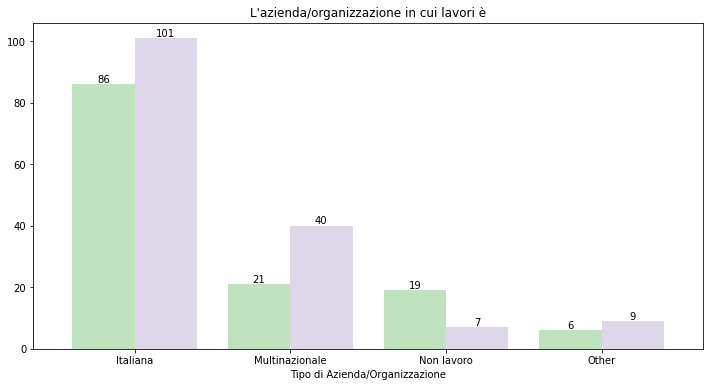

In [27]:
#Backup
bar_plot(df=answers, columns=["Gender", "Company_Type"], title=COMPANY_TYPE_QUESTION,
         filename="part2_backup_tipo_azienda_per_genere.pdf",
         axis_label="Tipo di Azienda/Organizzazione", width=0.8, sorted="values", wrapping=15, 
         legend=False, unstack_ord=(0, ), colors=gender_cmap.colors)

In [28]:
question(COMPANY_SIZE_QUESTION)

### Domanda: Quanto è grande l'organizzazione in cui lavori (azienda, centro di ricerca, altro)?

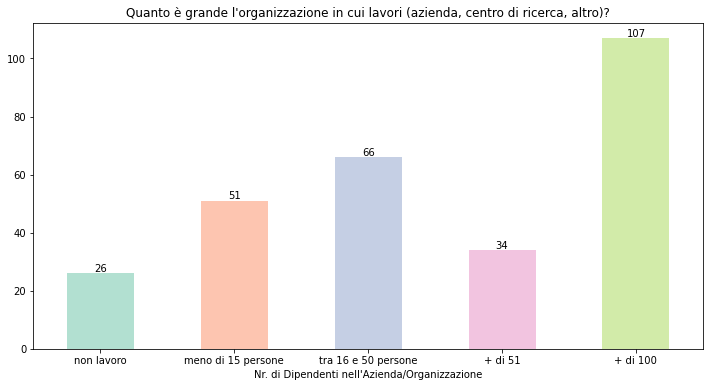

In [29]:
bar_plot(df=answers, columns=["Company_Size"], title=COMPANY_SIZE_QUESTION,
         filename="part2_02_campione_prof_dimensione_azienda.pdf",
         axis_label="Nr. di Dipendenti nell'Azienda/Organizzazione",)

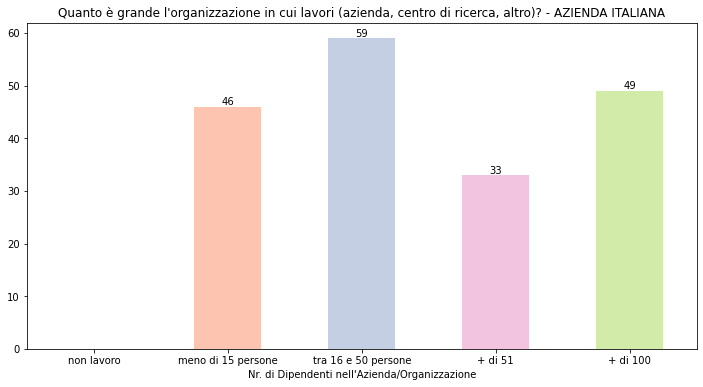

In [30]:
bar_plot(df=answers, columns=["Company_Size"],
         title=f"{COMPANY_SIZE_QUESTION} - AZIENDA ITALIANA",
         filename="part2_03_dimensione_azienda_italiana.pdf",
         selection=answers.Company_Type=="Italiana",
         axis_label="Nr. di Dipendenti nell'Azienda/Organizzazione",)

In [31]:
from form import WOMEN_RATIO_QUESTION, WOMEN_CIRCLE_QUESTION

question(WOMEN_RATIO_QUESTION)

### Domanda: Quante donne lavorano come developer nella tua stessa azienda, o sono nel tuo stesso percorso di studi?

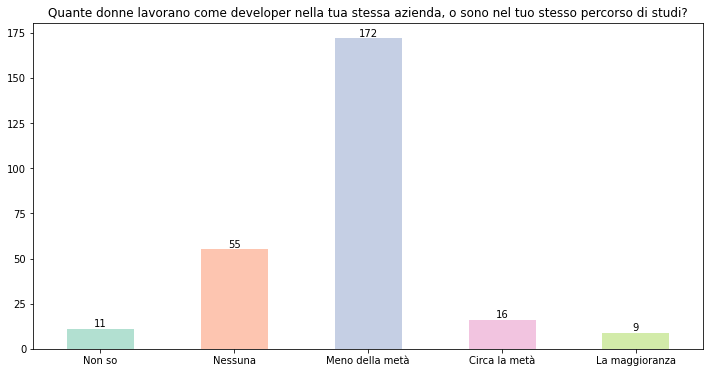

In [32]:
bar_plot(df=answers, columns=["Company_Women_Ratio"], title=WOMEN_RATIO_QUESTION,
         filename="part02_04_rapporto_donne_dev.pdf",
         selection=answers.Company_Size != "non lavoro", sorted="index")

Interessante notare come delle 55 "Nessuna" donna dev in Azienda, 49 siano nella sola Azienda Italiana

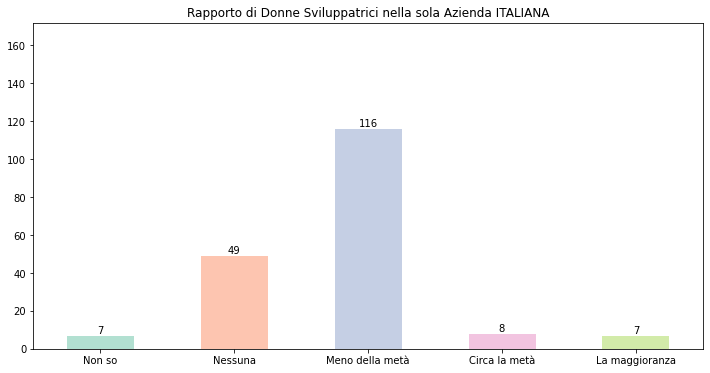

In [33]:
bar_plot(df=answers, columns=["Company_Women_Ratio"],
         title="Rapporto di Donne Sviluppatrici nella sola Azienda ITALIANA",
         filename="part2_05_rapporto_donne_dev_azienda_ita.pdf",
         selection=((answers.Company_Size != "non lavoro") & (answers.Company_Type == "Italiana")),
         sorted="index", value_lim=172)

In [34]:
from form import DIVERSITY_POLICY_QUESTION

question(DIVERSITY_POLICY_QUESTION)

### Domanda: La tua azienda applica politiche di diversity & inclusion?

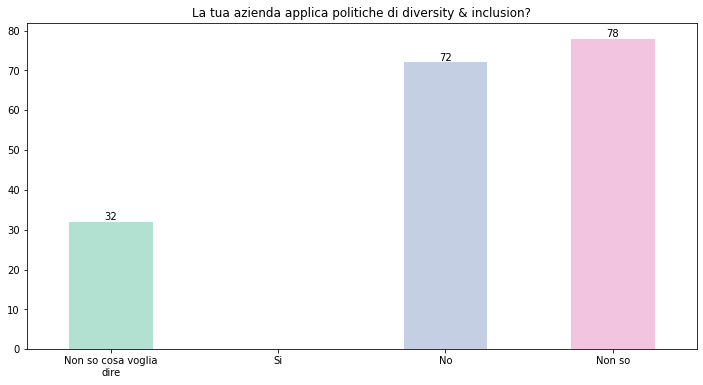

In [35]:
bar_plot(df=answers, columns=["Company_Diversity_Policy"],
         filename="part2_06_politiche_azienda_diversity.pdf",
         title=DIVERSITY_POLICY_QUESTION, sorted="index")

Rappresentante di Aziende con **MENO DELLA METÀ**

---

# Gender Gap

In [44]:
from form import INCREASE_GAP_QUESTION

question(INCREASE_GAP_QUESTION)

### Domanda: Pensi che dovrebbero esserci più donne nel settore informatica/programmazione?

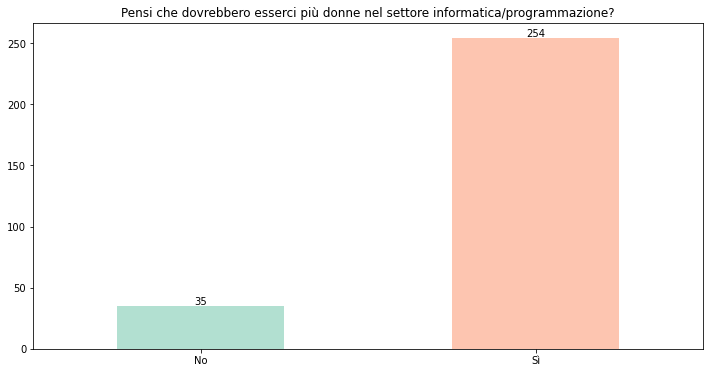

In [45]:
bar_plot(df=answers, columns=["increase_gender_gap"],
         title=INCREASE_GAP_QUESTION, sorted="index")

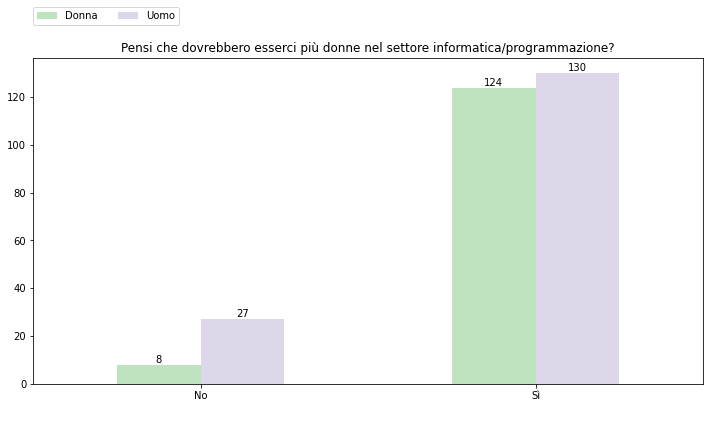

In [46]:
bar_plot(df=answers, columns=["Gender", "increase_gender_gap"], colors=gender_cmap.colors,
         title=INCREASE_GAP_QUESTION, sorted="index", unstack_ord=(0, ),
         axis_label=" ")

In [61]:
motivations_donna_nofix = set(answers[(answers.Gender == "Donna") & (answers.increase_gender_gap == "No")]["Open-FIX-gender-gap-Motivations"].values.tolist())
for i, m in enumerate(motivations_donna_nofix):
    print(f"{i+1}) {m}")

1) 
2) Non è che dovrebbero esserci in senso assoluto, per forza. Sarebbe importante che tutte le ragazze che lo desiderano fare non siano scoraggiate dal perseguire l'obiettivo.
3) O meglio, sarebbe bellissimo che più donne si appassionino a questo mondo ma rimane comunque una scelta della persona. Mi piacerebbe sì, ma non penso necessariamente che ció debba accadere.
4) Perché ci vorrebbe semplicemente equità, il sesso non ti definisce, ti definisce ciò che sai fare 
5) mi è indifferente
6) penso che ci dovrebbero essere menti logiche e analitiche
7) Per quanto mi riguarda non ho avuto problemi ad inserirmi nel settore dell'informatica/programmazione per via del fatto di essere una donna. Deduco che, ad oggi, non sarebbe un problema neanche per altre donne come me, e che quindi se siamo in minoranza in tal caso è perchè gli interessi sono differenti. 


In [53]:
motivations_uomo_nofix = set(answers[(answers.Gender == "Uomo") & (answers.increase_gender_gap == "No")]["Open-FIX-gender-gap-Motivations"].values.tolist())
for i, m in enumerate(motivations_uomo_nofix):
    print(f"{i+1}) {m}")

1) 
2) Non penso che il numero di rappresentanti di un qualsiasi genere dovrebbe impattare sulle politiche di recruiting di un’azienda. Dovrebbe essere assunto chi ne ha il merito a prescindere dal genere. 
3) penso che vadano rimossi tutti i possibili ostacoli all'accesso, e che tutti siano consapevoli di comportamenti che possono compromettere il benessere di qualunque minoranza. Ma non penso si debba favorire artificialmente l'ingresso delle donne nel settore
4) Perché credo che il numero di persone nel settore debba essere riflesso del numero di persone interessate nel settore, indipendentmente dal sesso. Se le donne sono meno interessate al settore, ne consegue ci siano meno donne. Non lo ritengo problematico
5) Ci devono essere le donne che vogliono intraprendere questo percorso secondo le loro passioni. Non si può parlare di quote rosa
6) In realtà è un "non saprei". Non ho motivi per dire perché dovrebbero esserci più donne né motivi per dire che non ce ne debbano essere di più

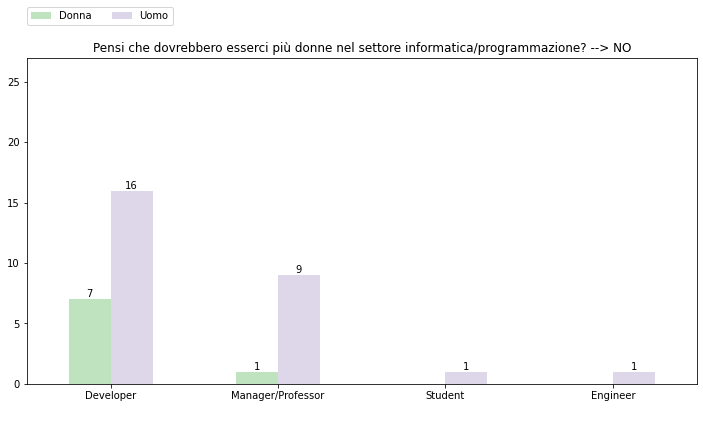

In [47]:
bar_plot(df=answers, columns=["Gender", "role_group"], colors=gender_cmap.colors,
         selection=answers.increase_gender_gap == "No",
         title=f"{INCREASE_GAP_QUESTION} --> NO", sorted="index", unstack_ord=(0, ),
         axis_label=" ", value_lim=27)

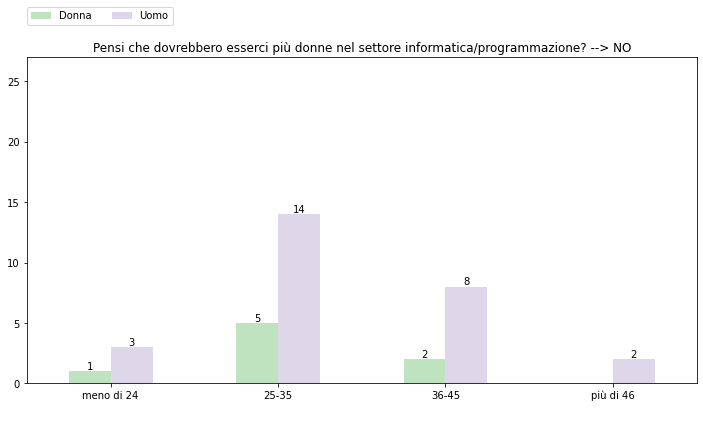

In [48]:
bar_plot(df=answers, columns=["Gender", "Age"], colors=gender_cmap.colors,
         selection=answers.increase_gender_gap == "No",
         title=f"{INCREASE_GAP_QUESTION} --> NO", sorted="index", unstack_ord=(0, ),
         axis_label=" ", value_lim=27)

**Reasons-Gender-Gap**

In [49]:
from form import WHY_GENDER_GAP_IN_IT, WHY_GENDER_GAP_IN_IT_QUESTION

question(WHY_GENDER_GAP_IN_IT_QUESTION)

### Domanda: Secondo te, perché in informatica/programmazione le donne sono una minoranza?

In [50]:
reasons_gg, other_reasons_gg, reasons_gg_map = process_multiple_choices(answers["Reasons-Gender-Gap"], choices=WHY_GENDER_GAP_IN_IT, other_cat_name="Altro")

reasons_gg_data = {"Gender": answers.Gender.values, "Age": answers.Age.values, 
                   "increase_gender_gap": answers.increase_gender_gap,
                   "role_group": answers.role_group.values}
reasons_gg_data.update(zip(reasons_gg, reasons_gg_map))
reasons_gg_df = pd.DataFrame(reasons_gg_data)

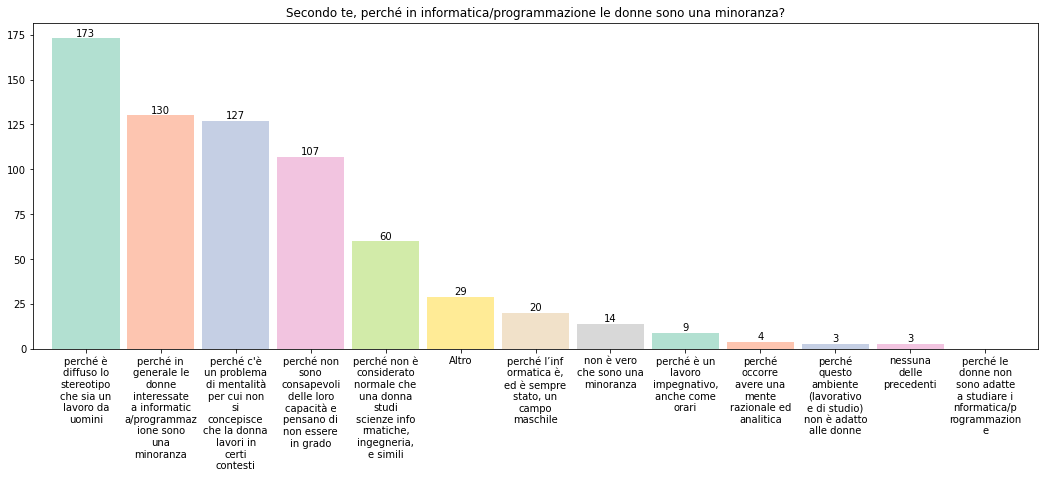

In [51]:
bar_plot(columns=reasons_gg, df=reasons_gg_df, wrapping=12,
         aggregate="sum", sorted="values", legend=False,
         figsize=(18, 6), width=0.9, title=WHY_GENDER_GAP_IN_IT_QUESTION)

In [52]:
REASONS_SELECTION = (
    "perché è diffuso lo stereotipo che sia un lavoro da uomini",
    "perché non sono consapevoli delle loro capacità e pensano di non essere in grado",
    "perché in generale le donne interessate a informatica/programmazione sono una minoranza",
    "perché c'è un problema di mentalità per cui non si concepisce che la donna lavori in certi contesti",
)

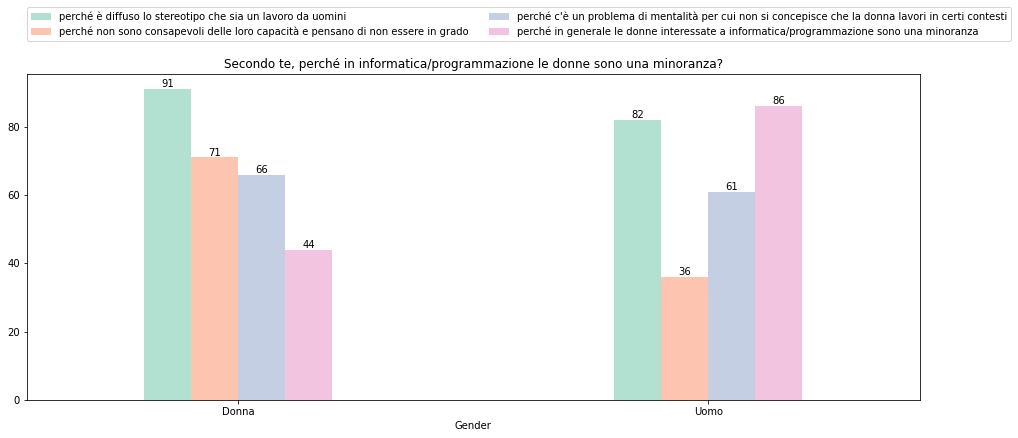

In [53]:
bar_plot(columns=reasons_gg_df.columns.intersection(REASONS_SELECTION + ("Gender", )).tolist(), 
         df=reasons_gg_df, wrapping=12, aggregate="sum", sorted="values", groupby_cols=["Gender", ],
         legend_col=2, figsize=(16, 6), width=0.4, title=WHY_GENDER_GAP_IN_IT_QUESTION)

**PERTANTO**, per la DONNA la maggior causa è data dallo stereotipo, mentre per UOMO la principale causa è la mancanza di interesse da parte delle donne (e poi è uno stereotipo, segue a ruota)

In [54]:
for r in other_reasons_gg:
    print(r.title())

Perché In Generale Le Donne *Che Non Vengono Scoraggiate Ad Interessarsi* A Informatica/Programmazione Sono Una Minoranza
Perche' Sono Meno Interessate Al Contesto Rispetto Agli Uomini Per Due Con-Cause Correlate: Il Contesto Stesso E' Dominato Dalla Cultura Maschile Per Motivi Storici Quindi Meno Attraente Finche' Non Ci Sara' Una Maggiore Presenza Femminile. La Concausa E' Che In Generale Le Donne Sono Interessate Ad Aspetti Che Sono Marginali O Poco Rappresentati Nel Contesto Della Programmazione Rispetto Ad Altri Ambiti Lavorativi.
Perché Manca Un Adeguato Orientamento Scolastico
Che Cavolo Ne So Io Bisogna Chiedere Le Donne
È Un Lavoro Molto Bello (Se Piace) Ma Allo Stesso Tempo In Tanti Casi Può Essere Un Molto Alienante Abbrutente. E' Un Discorso Molto Complesso Perchè Bisognerebbe Capire Anche I Vari Contesti Aziendali (Spesso Già Gli Uomini Anche Se Magari Ben Retribuiti Vengono Molto "Sfruttati" In Questo Settore Es. Orari Assurdi Body Rental ). A Parità Di Condizioni Credo C

Tuttavia...

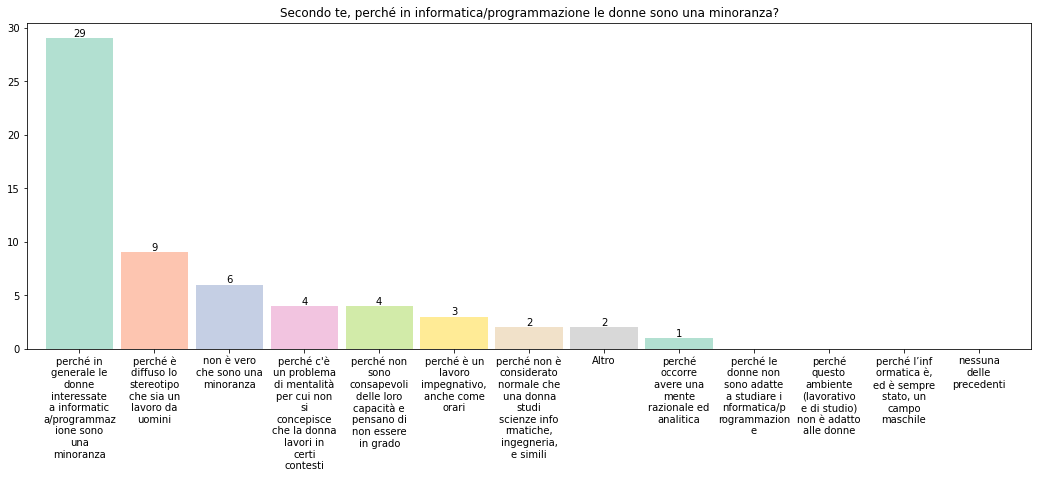

In [55]:
bar_plot(columns=reasons_gg, df=reasons_gg_df, wrapping=12,
         aggregate="sum", sorted="values", legend=False,
         selection=reasons_gg_df.increase_gender_gap == "No",
         figsize=(18, 6), width=0.9, title=WHY_GENDER_GAP_IN_IT_QUESTION)

Pertanto questo sotto-gruppo di partecipanti considera il gender-gap come la CAUSA e non l'EFFETTO, derivato da un fattore esterno di disinteresse delle Donne verso IT.

### Esperienze di Discriminazione della Donna (`Donna`)

In [55]:
from form import W_DISCRIMINATION_QUESTION, W_DISCRIMINATION

question(W_DISCRIMINATION_QUESTION)

### Domanda: Ti sei sentita discriminata, ostacolata, o messa in difficoltà nel tuo percorso di studi/carriera?

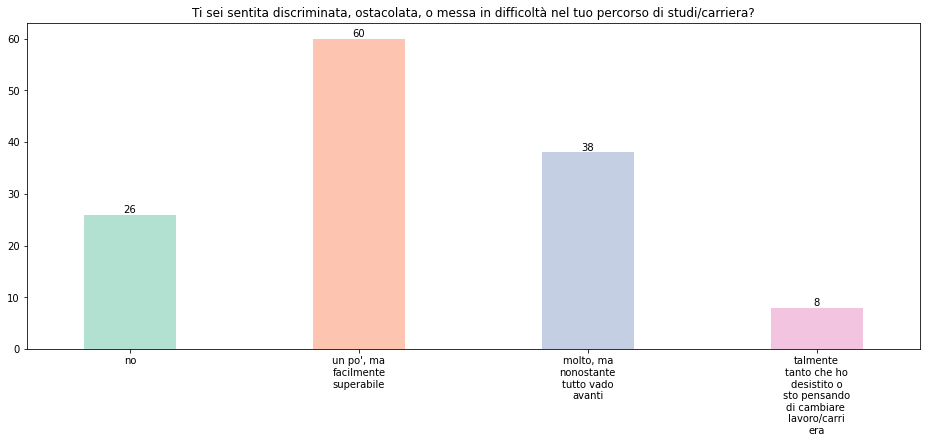

In [56]:
bar_plot(columns=["W_Discrimination"], df=answers, wrapping=12, sorted="index", figsize=(16, 6), width=0.4, title=W_DISCRIMINATION_QUESTION)

In [57]:
from form import W_EXPERIENCE, W_EXPERIENCE_QUESTION

question(W_EXPERIENCE_QUESTION)

### Domanda: Hai mai vissuto situazioni come queste?

In [58]:
w_exp, other_w_exp, w_exp_map = process_multiple_choices(answers[answers.Gender == "Donna"]["W-Experience"], choices=W_EXPERIENCE, other_cat_name="Altro")

data = {"Age": answers[answers.Gender == "Donna"].Age.values,
        "role_group": answers[answers.Gender == "Donna"].role_group.values,
        "Discrimination": answers[answers.Gender == "Donna"].W_Discrimination}
data.update(zip(w_exp, w_exp_map))
w_esp_df = pd.DataFrame(data)

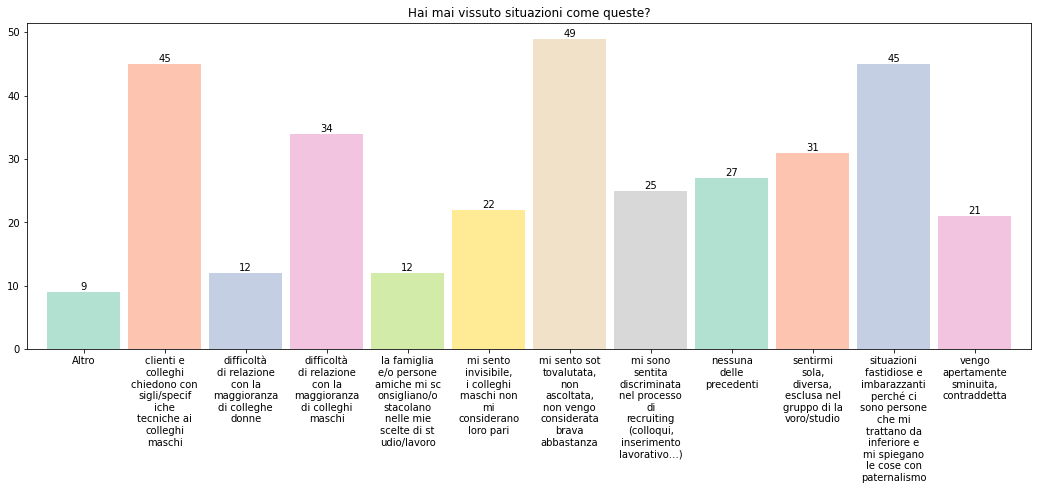

In [59]:
bar_plot(columns=w_esp_df.columns.difference(["Discrimination", "role_group", "Age"]).tolist(),
         df=w_esp_df, wrapping=12, aggregate="sum", sorted="index", legend=False,
         figsize=(18, 6), width=0.9, title=W_EXPERIENCE_QUESTION)

In [60]:
for e in other_w_exp:
    print(e)

Nel confronto pubblico (community social media) subisco un tot di mansplaining
Quando raggiungo successi vengono messi poco in evidenza i maschi si pavoneggiano di più ed i miei successi non vengono esaltati
mi e' stato apertamente detto "secondo me le donne non dovrebbero lavorare nella programmazione"
retribuzione minore rispetto ai colleghi maschi a parità di mansione ed esperienza
ho un carattere abbastanza aspetto e spiritoso ma ammetto che se così non fosse non mi sarei trovata sempre bene. Molti uomini non ti parlano per paura delle apparenze.
Solo i clienti hanno avuto perplessità nei confronti delle mie capacità in quando donna mentre i colleghi hanno avuto solo una perplessità prima di assumermi dopo no.
sentirmi in una posizione di diversità e di minoranza non esclusa ma comunque diversa
a volte mi sono sentita considerata come involucro e secondariamente come mente
spesso quando un cliente telefona dà per scontato che io sia la segretaria


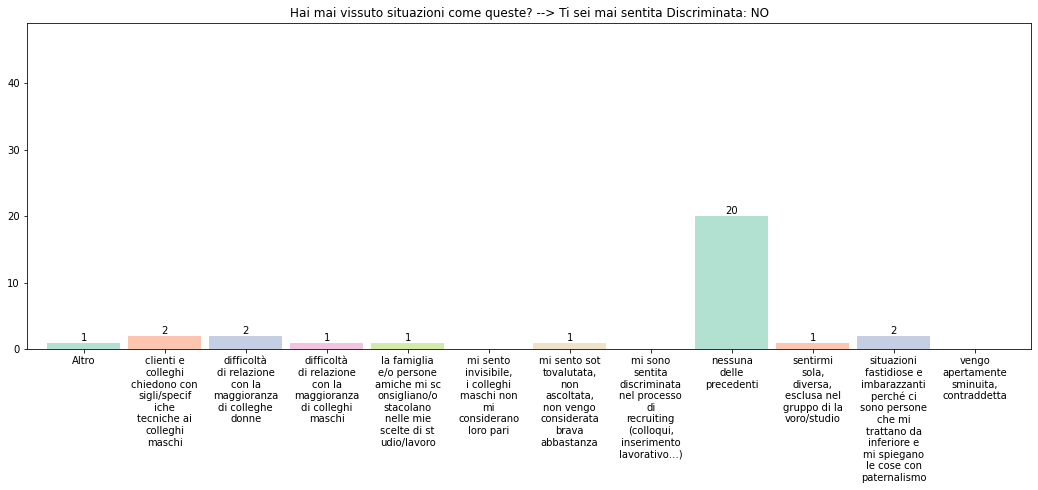

In [61]:
bar_plot(columns=w_esp_df.columns.difference(["Discrimination", "role_group", "Age"]).tolist(), 
         df=w_esp_df, 
         selection=w_esp_df.Discrimination.isin(["no"]),
         wrapping=12, aggregate="sum", sorted="index", legend=False,
         figsize=(18, 6), width=0.9, value_lim=49,
         title=f"{W_EXPERIENCE_QUESTION} --> Ti sei mai sentita Discriminata: NO")

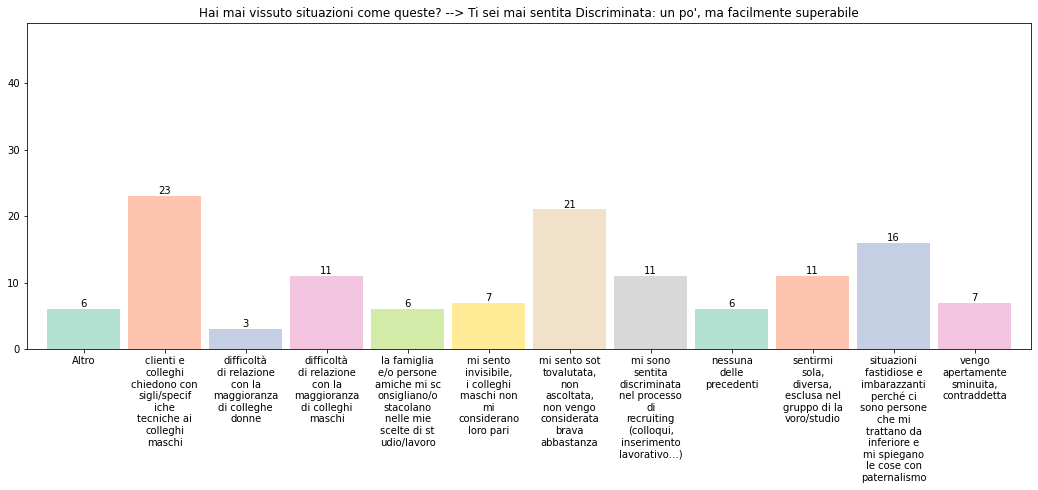

In [62]:
bar_plot(columns=w_esp_df.columns.difference(["Discrimination", "role_group", "Age"]).tolist(), 
         df=w_esp_df, 
         selection=w_esp_df.Discrimination.isin(["un po', ma facilmente superabile",]),
         wrapping=12, aggregate="sum", sorted="index", legend=False,
         figsize=(18, 6), width=0.9, value_lim=49,
         title=f"{W_EXPERIENCE_QUESTION} --> Ti sei mai sentita Discriminata: un po', ma facilmente superabile")

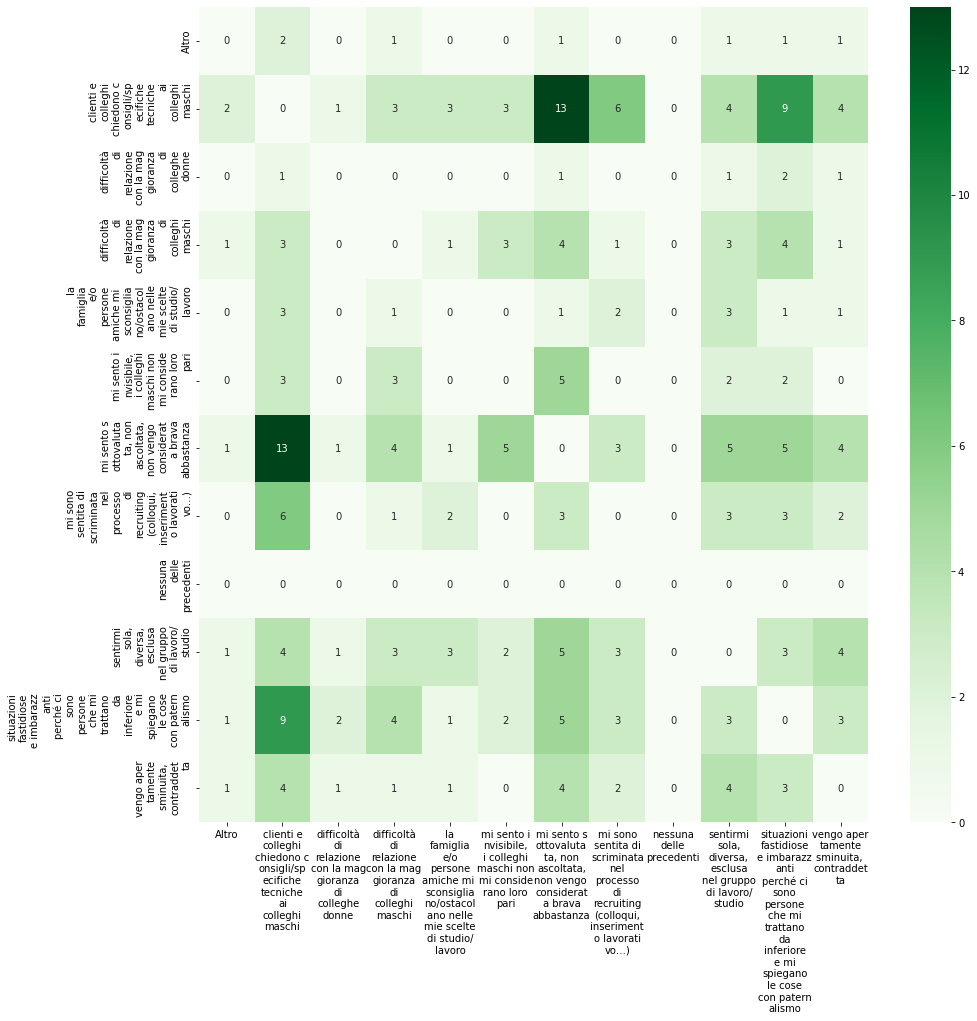

In [63]:
experiences = w_esp_df.columns.difference(["Discrimination", "role_group", "Age"]).tolist()
experience_selection = w_esp_df[w_esp_df.Discrimination == "un po', ma facilmente superabile"][experiences].values
heatmap_co_occurrence(experience_selection.T, labels=experiences, wrapping=10, colors="Greens", figsize=(15, 15), yticks_rot=90)

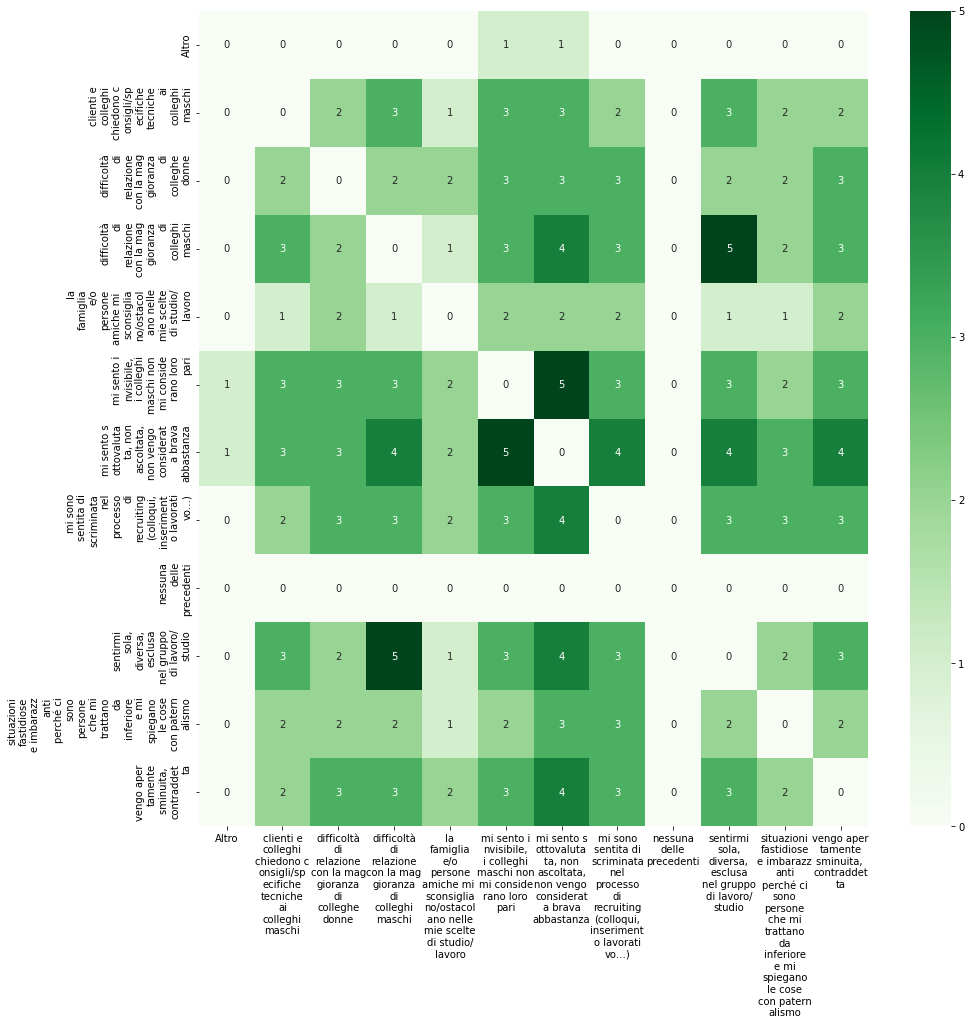

In [76]:
experiences = w_esp_df.columns.difference(["Discrimination", "role_group", "Age"]).tolist()
experience_selection = w_esp_df[w_esp_df.Discrimination == "talmente tanto che ho desistito o sto pensando di cambiare lavoro/carriera"][experiences].values
heatmap_co_occurrence(experience_selection.T, labels=experiences, wrapping=10, colors="Greens", figsize=(15, 15), yticks_rot=90)

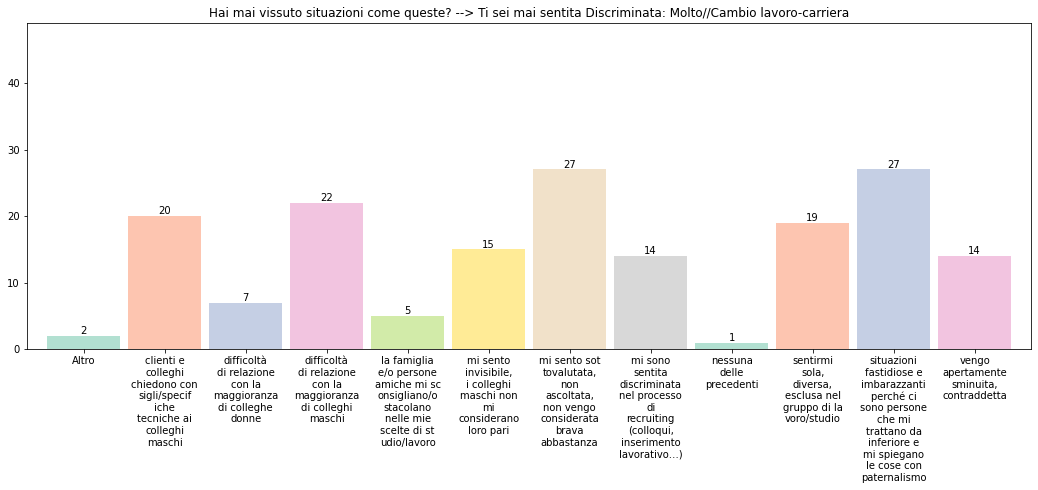

In [64]:
bar_plot(columns=w_esp_df.columns.difference(["Discrimination", "role_group", "Age"]).tolist(), 
         df=w_esp_df, 
         selection=w_esp_df.Discrimination.isin([
                    "molto, ma nonostante tutto vado avanti",
                    "talmente tanto che ho desistito o sto pensando di cambiare lavoro/carriera"]),
         wrapping=12, aggregate="sum", legend=False, sorted="index",
         figsize=(18, 6), width=0.9, value_lim=49,
         title=f"{W_EXPERIENCE_QUESTION} --> Ti sei mai sentita Discriminata: Molto//Cambio lavoro-carriera")

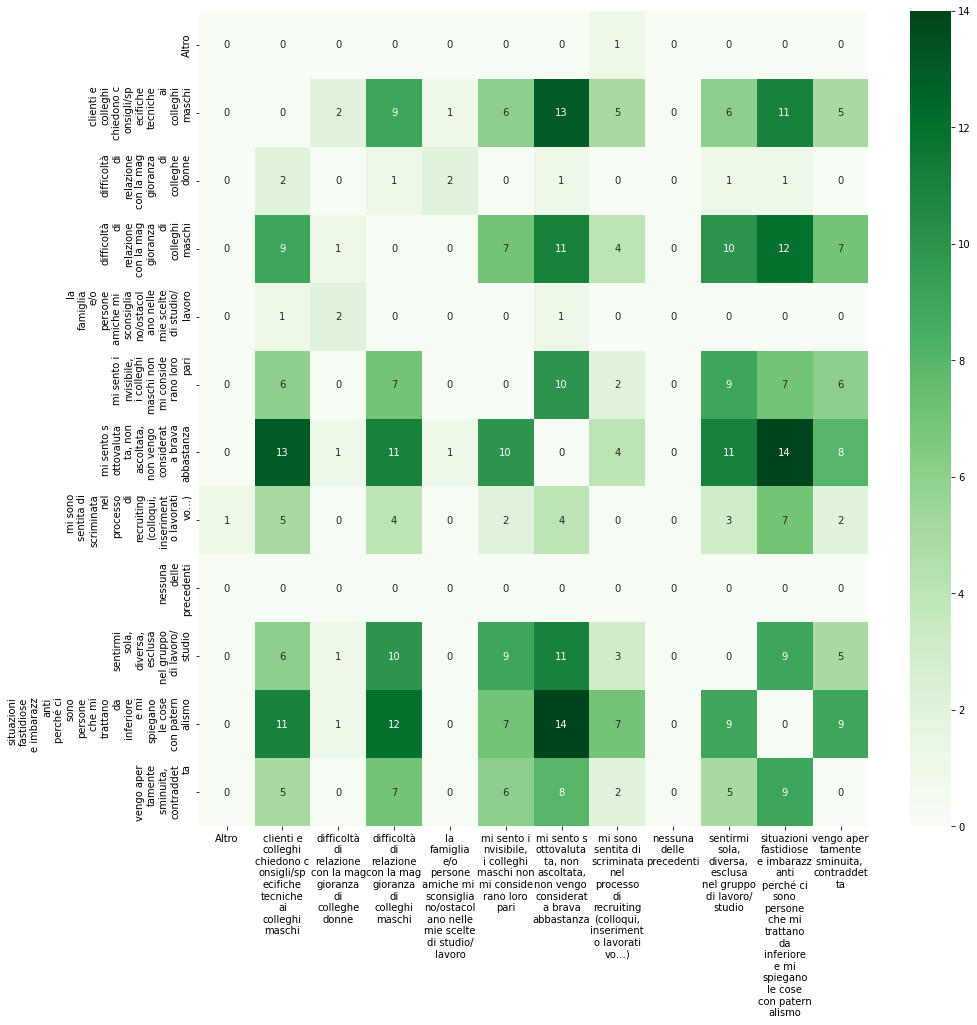

In [75]:
experiences = w_esp_df.columns.difference(["Discrimination", "role_group", "Age"]).tolist()
experience_selection = w_esp_df[w_esp_df.Discrimination.isin([
                    "molto, ma nonostante tutto vado avanti",
                    ])][experiences].values
heatmap_co_occurrence(experience_selection.T, labels=experiences, wrapping=10, colors="Greens", figsize=(15, 15), yticks_rot=90)

---

### Esperienze di Discriminazione della Donna (`Uomo`)

In [66]:
from form import M_DISCRIMINATION_QUESTION, M_DISCRIMINATION

question(M_DISCRIMINATION_QUESTION)

### Domanda: Credi che le donne che fanno il tuo stesso lavoro/percorsi di studi, incontrino ostacoli, discriminazioni, situazioni di difficoltà?

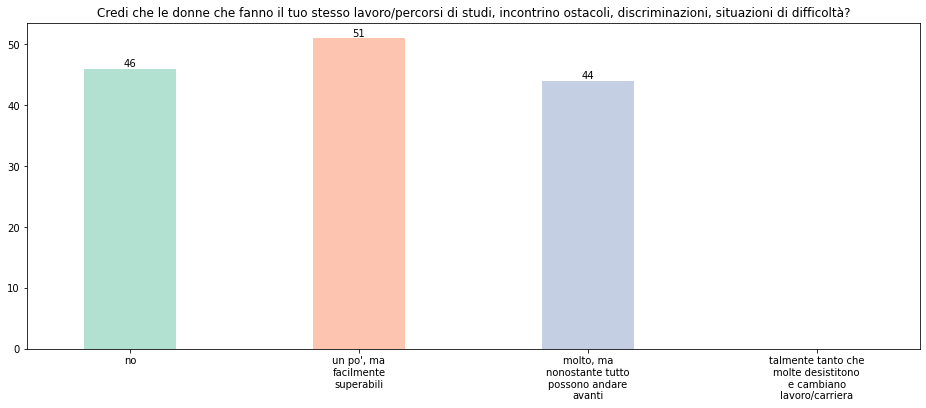

In [67]:
bar_plot(columns=["M_Discrimination"], df=answers, wrapping=18, sorted="index", figsize=(16, 6), width=0.4, title=M_DISCRIMINATION_QUESTION)

In [68]:
from form import M_EXPERIENCE, M_EXPERIENCE_QUESTION

question(M_EXPERIENCE_QUESTION)

### Domanda: Alle donne che lavorano nel tuo settore secondo te sono successe situazioni come quelle sotto?

In [69]:
m_exp, other_m_exp, m_exp_map = process_multiple_choices(answers[answers.Gender == "Uomo"]["M-Experience"], choices=M_EXPERIENCE, other_cat_name="Altro")

data = {"Age": answers[answers.Gender == "Uomo"].Age.values,
        "role_group": answers[answers.Gender == "Uomo"].role_group.values,
        "Discrimination": answers[answers.Gender == "Uomo"].M_Discrimination}
data.update(zip(m_exp, m_exp_map))
m_esp_df = pd.DataFrame(data)

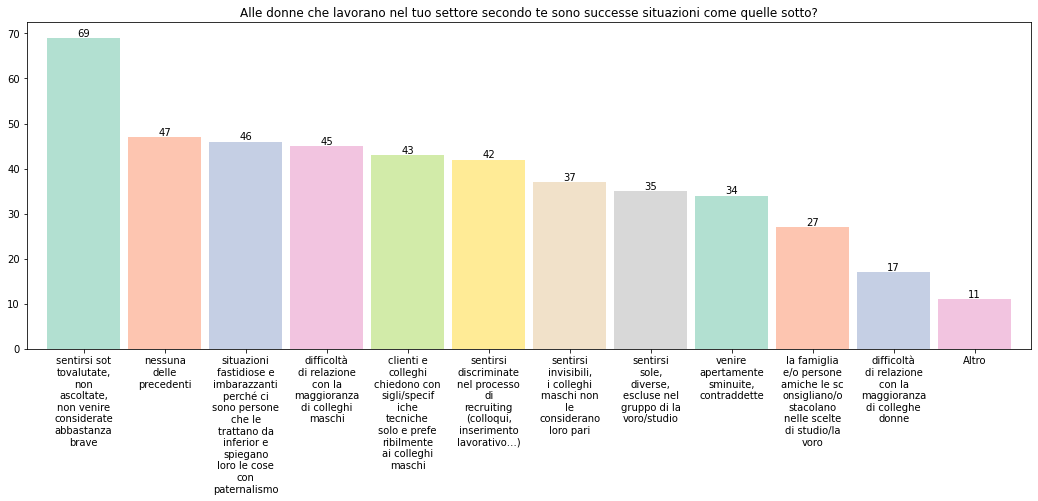

In [70]:
bar_plot(columns=m_esp_df.columns.difference(["Discrimination", "role_group", "Age"]).tolist(),
         df=m_esp_df, wrapping=12, aggregate="sum", sorted="values", legend=False,
         figsize=(18, 6), width=0.9, title=M_EXPERIENCE_QUESTION)

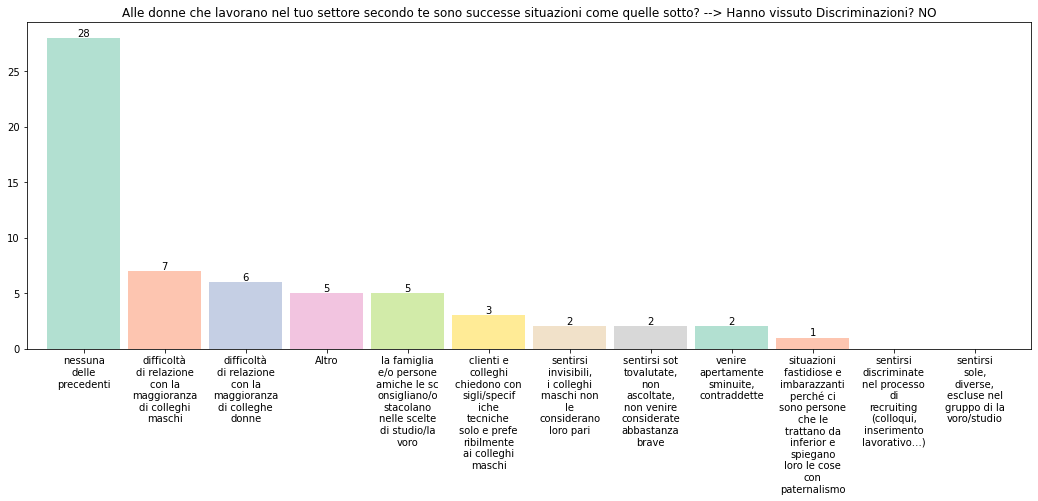

In [71]:
bar_plot(columns=m_esp_df.columns.difference(["Discrimination", "role_group", "Age"]).tolist(),
         selection=m_esp_df.Discrimination == "no",
         df=m_esp_df, wrapping=12, aggregate="sum", sorted="values", legend=False,
         figsize=(18, 6), width=0.9, title=f"{M_EXPERIENCE_QUESTION} --> Hanno vissuto Discriminazioni? NO")

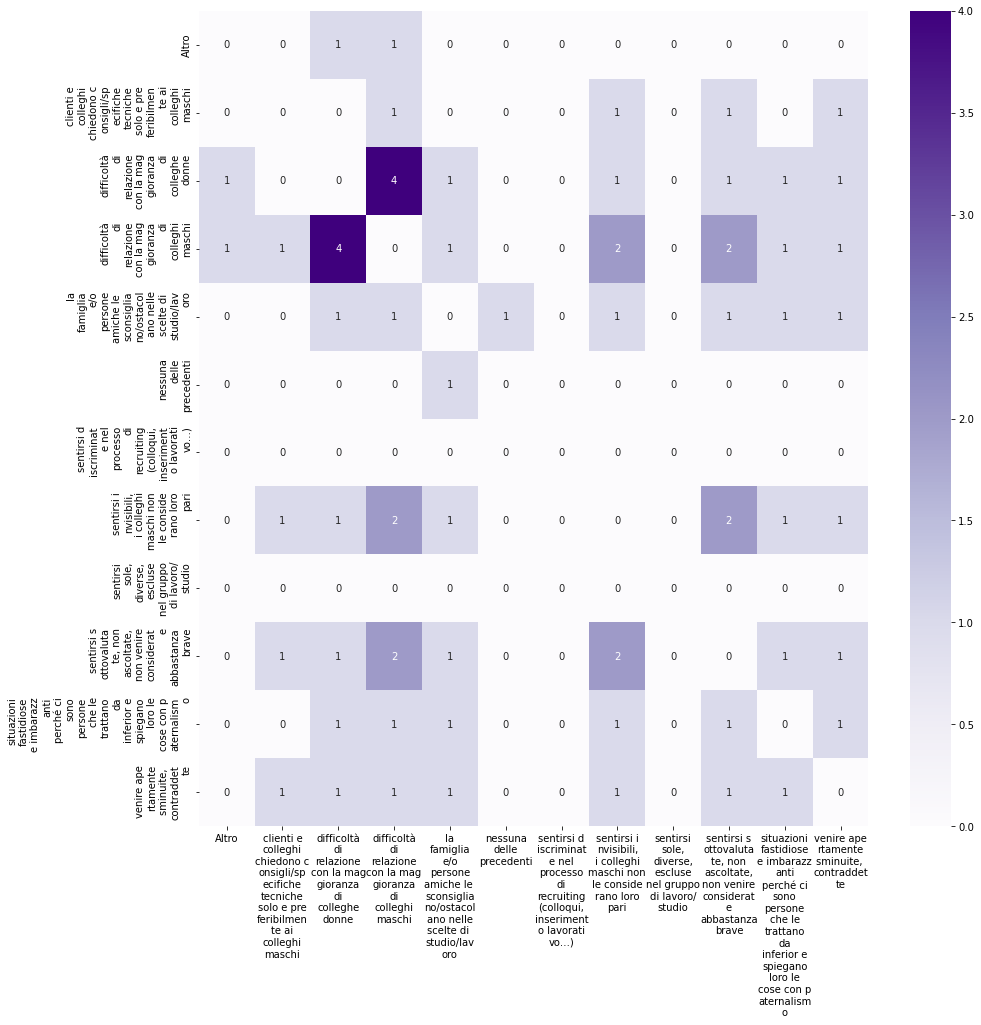

In [72]:
experiences = m_esp_df.columns.difference(["Discrimination", "role_group", "Age"]).tolist()
experience_selection = m_esp_df[m_esp_df.Discrimination ==  "no"][experiences].values
heatmap_co_occurrence(experience_selection.T, labels=experiences, wrapping=10, colors="Purples", figsize=(15, 15), yticks_rot=90)

Da qui emerge che questo sotto campione dei partecipanti considerano il problema della discriminazione come un "semplice" problema relazionale delle donne con lo stesso o altro sesso. La maggiorparte delle risposte sono cmq relative alla scelta "Nessuna delle precedenti", in linea con la precedente risposta sulla Discriminazione.

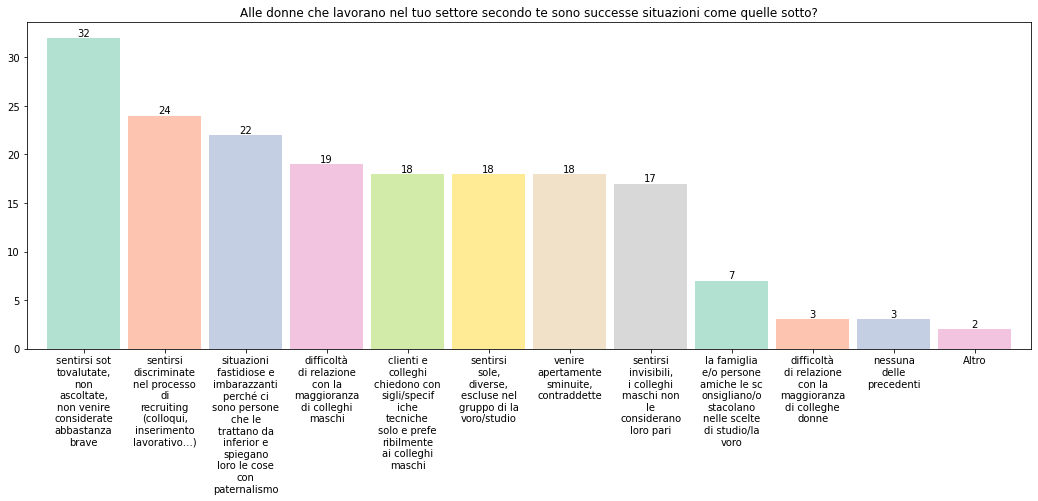

In [73]:
bar_plot(columns=m_esp_df.columns.difference(["Discrimination", "role_group", "Age"]).tolist(),
         selection=m_esp_df.Discrimination ==  "molto, ma nonostante tutto possono andare avanti",
         df=m_esp_df, wrapping=12, aggregate="sum", sorted="values", legend=False,
         figsize=(18, 6), width=0.9, title=M_EXPERIENCE_QUESTION)

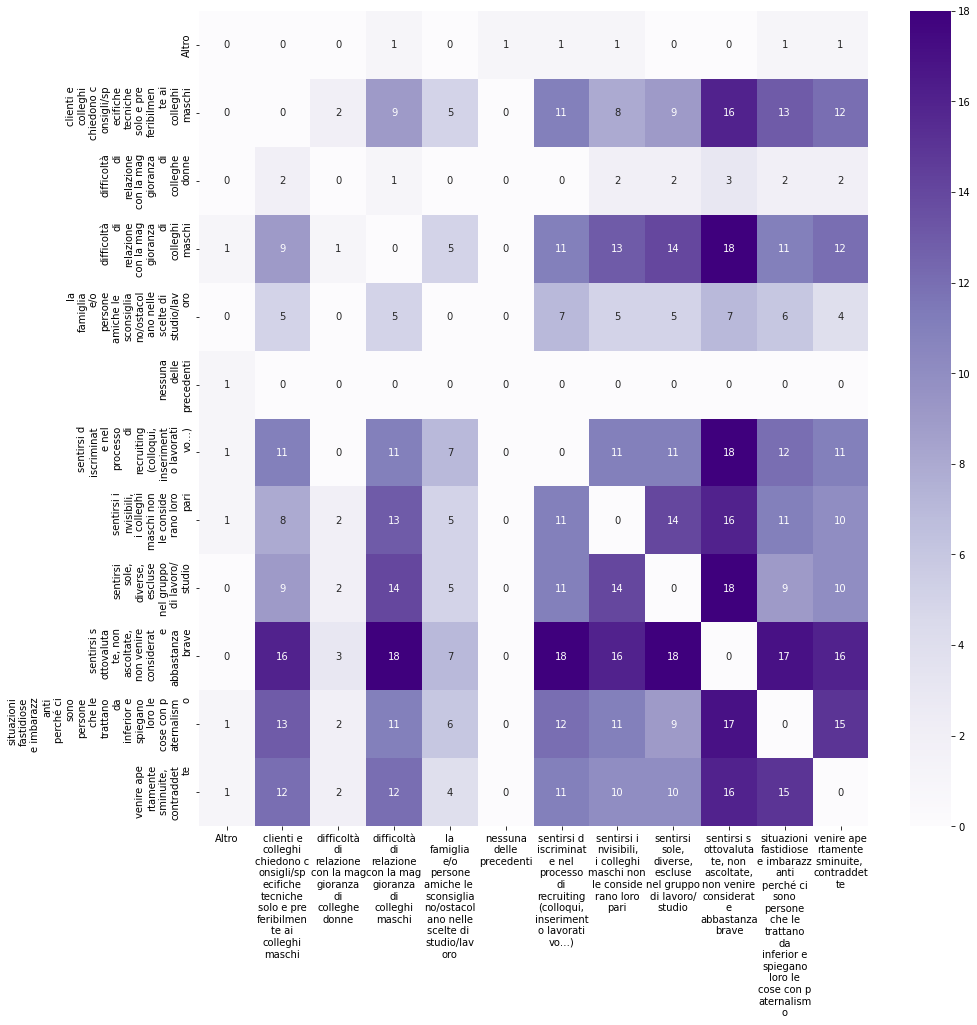

In [74]:
experiences = m_esp_df.columns.difference(["Discrimination", "role_group", "Age"]).tolist()
experience_selection = m_esp_df[m_esp_df.Discrimination ==  "molto, ma nonostante tutto possono andare avanti"][experiences].values
heatmap_co_occurrence(experience_selection.T, labels=experiences, wrapping=10, colors="Purples", figsize=(15, 15), yticks_rot=90)

**NOTE**: Importante il RUOLO di **Nessuna delle precedenti** che non viene quasi mai selezionata da `Uomo`. 
Apparentemente sembra che le scelte di situazioni proposte siano considerate sufficientemente esaustive nel coprire lo spettro di situazioni possibili.

Del resto, si parla di esperienze altrui, per cui sembra un dato ragionevole.

---

In [62]:
from form import WORKAROUND_GENDER_GAP, WORKAROUND_GENDER_GAP_QUESTION

question(WORKAROUND_GENDER_GAP_QUESTION)

### Domanda: Secondo te, cosa sarebbe utile fare, per favorire un aumento del numero di donne nel settore?

In [64]:
fix_gender_gap_ideas, other_ideas_exp, fix_gender_gap_map = process_multiple_choices(answers["Open-FIX-Gender-Gap-Ideas"], choices=WORKAROUND_GENDER_GAP, other_cat_name="Altro")

data = {"Gender": answers.Gender.values,
        "role_group": answers.role_group.values,
        "increase_gender_gap": answers.increase_gender_gap}
data.update(zip(fix_gender_gap_ideas, fix_gender_gap_map))
fix_gender_gap_map_df = pd.DataFrame(data)

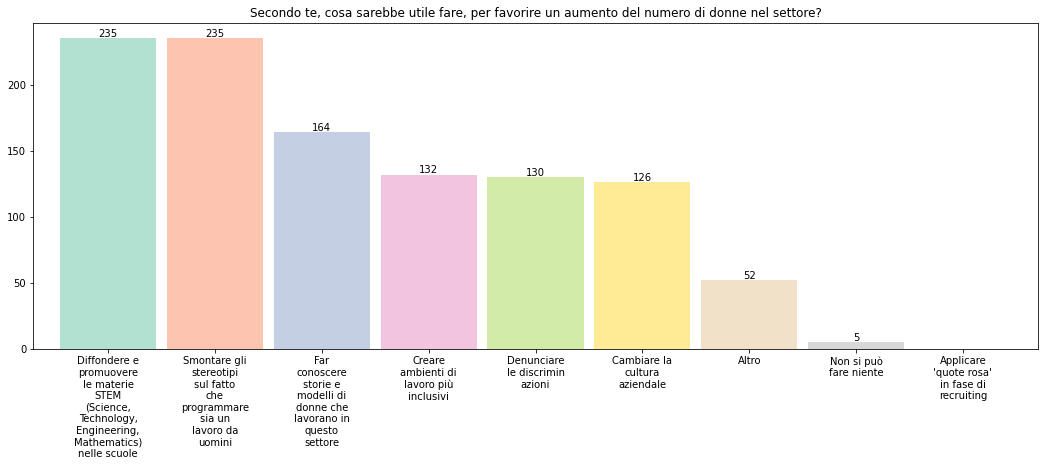

In [65]:
bar_plot(columns=fix_gender_gap_ideas,
         df=fix_gender_gap_map_df, wrapping=12, aggregate="sum", sorted="values", legend=False,
         figsize=(18, 6), width=0.9, title=WORKAROUND_GENDER_GAP_QUESTION)

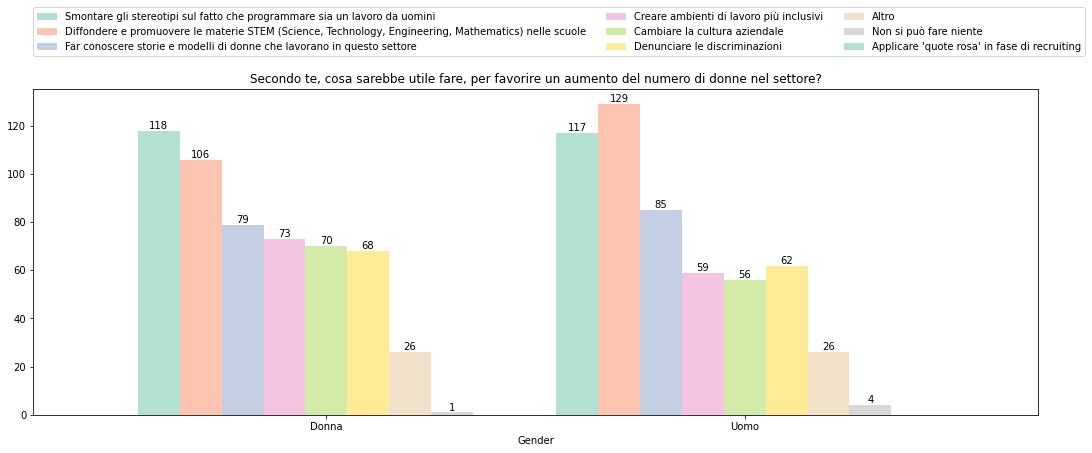

In [70]:
bar_plot(columns=fix_gender_gap_map_df.columns.difference(["increase_gender_gap", "role_group"]).tolist(),
         df=fix_gender_gap_map_df, wrapping=12, aggregate="sum", sorted="values", 
         groupby_cols=["Gender", ],
         figsize=(18, 6), width=0.9, title=WORKAROUND_GENDER_GAP_QUESTION)

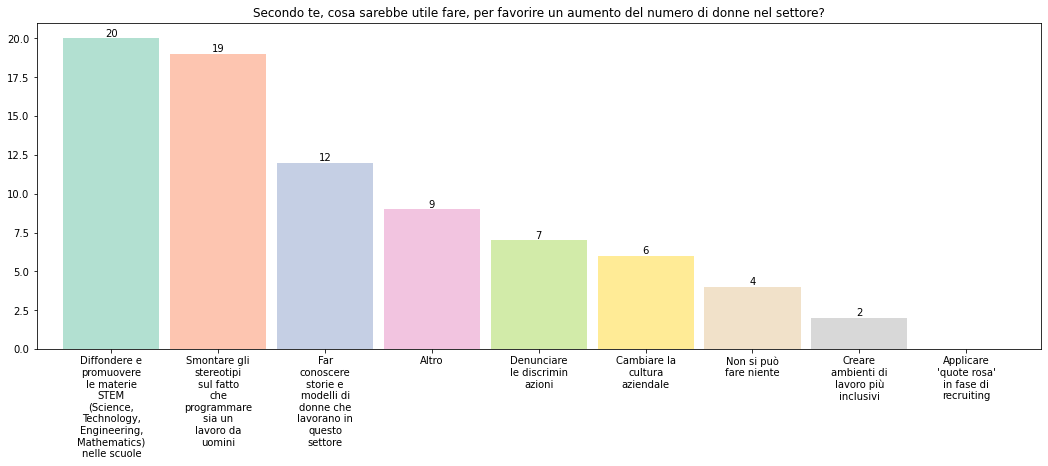

In [75]:
bar_plot(columns=fix_gender_gap_map_df.columns.difference(["Gender", "increase_gender_gap", "role_group"]).tolist(),
         df=fix_gender_gap_map_df, wrapping=12, aggregate="sum", sorted="values", 
         selection=fix_gender_gap_map_df.increase_gender_gap == "No", legend=False,
         figsize=(18, 6), width=0.9, title=WORKAROUND_GENDER_GAP_QUESTION)

In [77]:
fix_gender_gap_map_df.increase_gender_gap.unique()

['Sì', 'No']
Categories (2, object): ['No', 'Sì']

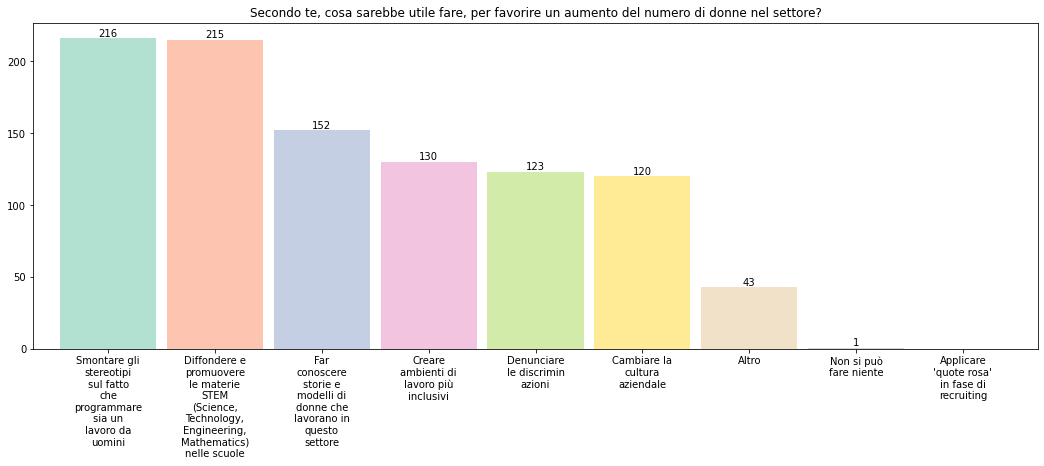

In [78]:
bar_plot(columns=fix_gender_gap_map_df.columns.difference(["Gender", "increase_gender_gap", "role_group"]).tolist(),
         df=fix_gender_gap_map_df, wrapping=12, aggregate="sum", sorted="values", 
         selection=fix_gender_gap_map_df.increase_gender_gap == "Sì", legend=False,
         figsize=(18, 6), width=0.9, title=WORKAROUND_GENDER_GAP_QUESTION)